<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Тема 1. Первичный анализ данных с Pandas</center>
## <center>Практическое задание. Анализ данных пассажиров "Титаника"</center>

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/SbRcpW).**

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

**Считаем данные из файла в память в виде объекта Pandas.DataFrame**

In [11]:
# ---- ---- ---- ----
import os
import urllib.request

url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/titanic_train.csv'
filename = 'titanic_train.csv'
urllib.request.urlretrieve(url, filename)

data = pd.read_csv("titanic_train.csv", index_col="PassengerId")
os.remove("titanic_train.csv")
# ---- ---- ---- ----
# data = pd.read_csv("../../data/titanic_train.csv", index_col="PassengerId")

**Данные представлены в виде таблицы. Посмотрим на первые 5 строк:**

In [9]:
data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Для примера отберем пассажиров, которые сели в Cherbourg (Embarked=C) и заплатили более 200 у.е. за билет (fare > 200).**

Убедитесь, что Вы понимаете, как эта конструкция работает. <br>
Если нет – посмотрите, как вычисляется выражение в квадратных в скобках.

In [7]:
data[(data["Embarked"] == "C") & (data.Fare > 200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


**Можно отсортировать этих людей по убыванию платы за билет.**

In [8]:
data[(data["Embarked"] == "C") & (data["Fare"] > 200)].sort_values(
    by="Fare", ascending=False
).head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**Пример создания признака.**

In [11]:
def age_category(age):
    """
    < 30 -> 1
    >= 30, <55 -> 2
    >= 55 -> 3
    """
    if age < 30:
        return 1
    elif age < 55:
        return 2
    else:
        return 3

In [12]:
age_categories = [age_category(age) for age in data.Age]

In [13]:
data["Age_category"] = age_categories

**Другой способ – через `apply`.**

In [14]:
data["Age_category"] = data["Age"].apply(age_category)

**1. Сколько мужчин / женщин находилось на борту?**
- 412 мужчин и 479 женщин
- 314 мужчин и 577 женщин
- 479 мужчин и 412 женщин
- 577 мужчин и 314 женщин

In [17]:
# Ваш код здесь
print(len(data[data['Sex'] == "male"]), 
      "мужчин и", 
      len(data[data['Sex'] == "female"]), 
      "женщин"
     )

577 мужчин и 314 женщин


**2. Выведите распределение переменной `Pclass` (социально-экономический статус) и это же распределение, только для мужчин / женщин по отдельности. Сколько было мужчин 2-го класса?**
- 104
- 108
- 112
- 125

In [18]:
# Ваш код здесь
# data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Pclass'].value_counts()[2]
# data[data['Sex'] == 'male']['Pclass'].value_counts()
data[data['Sex'] == 'male']['Pclass'].value_counts()[2] # где 2 - ключ

108

**3. Каковы медиана и стандартное отклонение платежей (`Fare`)? Округлите до 2 десятичных знаков.**
- Медиана – 14.45, стандартное отклонение – 49.69
- Медиана – 15.1, стандартное отклонение – 12.15
- Медиана – 13.15, стандартное отклонение – 35.3
- Медиана – 17.43, стандартное отклонение – 39.1

In [16]:
# Ваш код здесь
print("median – {:.2f}, std - {:.2f}".format(data['Fare'].median(), data['Fare'].std()))

median – 14.45, std - 49.69


**4. Правда ли, что люди моложе 30 лет выживали чаще, чем люди старше 60 лет? Каковы доли выживших в обеих группах?**
- 22.7% среди молодых и 40.6% среди старых
- 40.6% среди молодых и 22.7% среди старых
- 35.3% среди молодых и 27.4% среди старых
- 27.4% среди молодых и 35.3% среди старых

In [26]:
# Ваш код здесь
print("{:.1f}% среди молодых и {:.1f}% среди старых".format(
        data[(data['Age'] < 30)]['Survived'].mean() * 100,
        data[(data['Age'] > 60)]['Survived'].mean() * 100
))

40.6% среди молодых и 22.7% среди старых


**5. Правда ли, что женщины выживали чаще мужчин? Каковы доли выживших в обеих группах?**
- 30.2% среди мужчин и 46.2% среди женщин
- 35.7% среди мужчин и 74.2% среди женщин
- 21.1% среди мужчин и 46.2% среди женщин
- 18.9% среди мужчин и 74.2% среди женщин

In [28]:
# Ваш код здесь
print("{:.1f}% среди мужчин и {:.1f}% среди женщин".format(
        data[(data['Sex'] == 'male')]['Survived'].mean() * 100,
        data[(data['Sex'] == 'female')]['Survived'].mean() * 100
))

18.9% среди мужчин и 74.2% среди женщин


**6. Найдите самое популярное имя среди пассажиров Титаника мужского пола?**
- Charles
- Thomas
- William
- John

In [190]:
# Ваш код здесь

# Смотрим на данные
data[data['Sex'] == 'male']['Name'].value_counts().sort_values(ascending=True)

# Вытаскиваем все имена
names = data[data['Sex'] == 'male']['Name'].to_numpy()  # unique()
# print(len(names))

# Смотрим какие есть приставки (по-приколу чисто) 
# + убеждаемся что точка есть везде
# np.unique([name[name.find(',') + 2 : name.find('.')] for name in names])

# Смотрим первую последовательность символов после точки
res = pd.DataFrame(np.array(
    [name[name.find('.') + 2:].split()[0] 
     for name 
     in names]
    )).value_counts().index[0][0]
# print(res)

### OR with one line:

print(data[data['Sex'] == 'male']['Name']
      .apply(lambda name: name[name.find('.') + 2:].split()[0])
      .value_counts()
      .index[0]
     )


William


**7. Сравните графически распределение стоимости билетов и возраста у спасенных и у погибших. Средний возраст погибших выше, верно?**
- Да 
- Нет

Средний возраст у спасённых - 28 лет, у погибших - 31


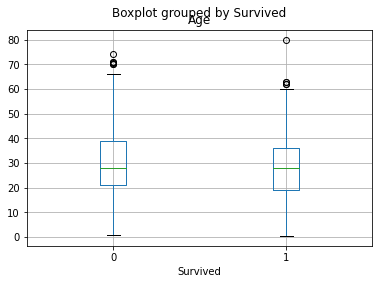

Ответ: Да, т.к. ... но почему??? Где на графике это видно?
Неужели это из-за того что медианы находятся на однаковых
высотах, в то время как соответственные квартили (0.25, 0.75)
выше у тех кто погиб


In [268]:
# Ваш код здесь

# надо дополнительно установить (команда в терминале)
# чтоб картинки рисовались в тетрадке
# !conda install seaborn
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

print("Средний возраст у спасённых - {:.0f} лет, у погибших - {:.0f}"
      .format(
        data[(data['Survived'] == 1)]['Age'].mean(),
        data[(data['Survived'] == 0)]['Age'].mean()
))

data.boxplot(column="Age", by='Survived', labels=['s', "ss"])
# data[(data['Survived'] == 1)].boxplot(column="Age", by='Survived')
# data[(data['Survived'] == 0)].boxplot(column="Age", by='Survived')
# df.boxplot(column="Age", by="looks")
plt.show()

print("Ответ: {}"
        .format('Да' if (data[(data['Survived'] == 1)]['Age'].mean() <
                         data[(data['Survived'] == 0)]['Age'].mean())
                     else 'Нет'
) + ", т.к. ... но почему??? Где на графике это видно?\n"
  + "Неужели это из-за того что медианы находятся на однаковых\n"
  + "высотах, в то время как соответственные квартили (0.25, 0.75)\n" 
  + "выше у тех кто погиб")
# boxplot отображает:
#   медиану, нижний и верхний квартили, 
#   минимальное и максимальное значение, выбросы

**8. Как отличается средний возраст мужчин / женщин в зависимости от класса обслуживания? Выберите верные утверждения:**
- В среднем мужчины 1-го класса старше 40 лет
- В среднем женщины 1-го класса старше 40 лет
- Мужчины всех классов в среднем старше женщин того же класса
- В среднем люди в 1 классе старше, чем во 2-ом, а те старше представителей 3-го класса

Мужчины:


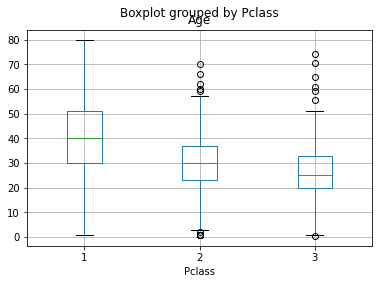



Женщины:


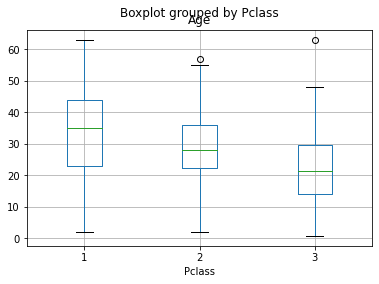

утв. 1 -  Верно
утв. 2 -  Ложно
утв. 3 -  Верно
утв. 4 -  Верно


In [267]:
# Ваш код здесь

print('Мужчины:')
data[(data['Sex'] == 'male')].boxplot(column="Age", by='Pclass')
plt.show()

print('\n\nЖенщины:')
data[(data['Sex'] == 'female')].boxplot(column="Age", by='Pclass')
plt.show()

# утв. 1 - Не видно, хотя видя квантили и медиану можно сказать что да
print("утв. 1 - ",  
        'Верно' 
        if data[(data['Sex'] == 'male') & (data['Pclass'] == 1)
                ]['Age'].mean() > 40
        else 'Ложно')

# утв. 2 - FALSE
print("утв. 2 - ", 'Верно' 
        if data[
        (data['Sex'] == 'female') & (data['Pclass'] == 1)
                        ]['Age'].mean() > 40
        else 'Ложно')

# утв. 3 - TRUE (смотрим по медианам)
print("утв. 3 - ", 'Верно' 
      if data[(data['Sex'] == 'male') & (data['Pclass'] == 1)]['Age'].median() 
       > data[(data['Sex'] == 'female') & (data['Pclass'] == 1)]['Age'].median()
       and data[(data['Sex'] == 'male') & (data['Pclass'] == 2)]['Age'].median() 
       > data[(data['Sex'] == 'female') & (data['Pclass'] == 2)]['Age'].median()
       and data[(data['Sex'] == 'male') & (data['Pclass'] == 3)]['Age'].median() 
       > data[(data['Sex'] == 'female') & (data['Pclass'] == 3)]['Age'].median()
      else 'Ложно'
     )

# утв. 4 - TRUE
print("утв. 4 - ", 'Верно' 
      if data[(data['Pclass'] == 1)]['Age'].median() 
        > data[(data['Pclass'] == 2)]['Age'].median()
        > data[(data['Pclass'] == 3)]['Age'].median()
      else 'Ложно'
     )